In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
iris = load_iris()

In [2]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
df.shape

(150, 4)

In [7]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
df['flower_name'] = df.target.apply(lambda x : iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [9]:
%matplotlib inline
df0 = df[df.target == 0]
df1 = df[df.target == 1]
df2 = df[df.target == 2]

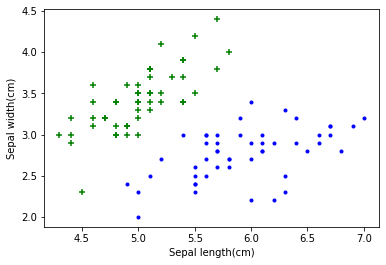

In [10]:
plt.xlabel('Sepal length(cm)')
plt.ylabel('Sepal width(cm)')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color='green',marker = '+')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='blue',marker = '.')

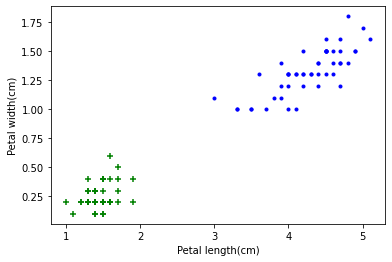

In [28]:
plt.xlabel('Petal length(cm)')
plt.ylabel('Petal width(cm)')
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='green',marker = '+')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='blue',marker = '.')

In [12]:
X = df.drop(['flower_name','target'],axis = 1)
Y = df.target

In [13]:
X_train , X_test , Y_train ,Y_test = train_test_split(X,Y,test_size=0.2 , random_state=1)

In [14]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


# Create KNN (K Nearest Neighbor Classifier)

In [15]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [16]:
knn.score(X_test,Y_test)

1.0

In [17]:
knn1 = KNeighborsClassifier(n_neighbors=10)
knn1.fit(X_train,Y_train)
knn1.score(X_test,Y_test)

0.9666666666666667

In [18]:
knn2 = KNeighborsClassifier(n_neighbors=6) # optimisised value for 120 training set
knn2.fit(X_train,Y_train)
knn2.score(X_test,Y_test)

1.0

In [19]:
Y_pred = knn.predict(X_test)
cm1 =confusion_matrix(Y_test,Y_pred)
cm1

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

In [20]:
Y_pred1 = knn1.predict(X_test)
cm2 = confusion_matrix(Y_test,Y_pred1)
cm2

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

In [21]:
Y_pred2 = knn2.predict(X_test)
cm3 = confusion_matrix(Y_test,Y_pred2)
cm3

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

Text(42.0, 0.5, 'Truth')

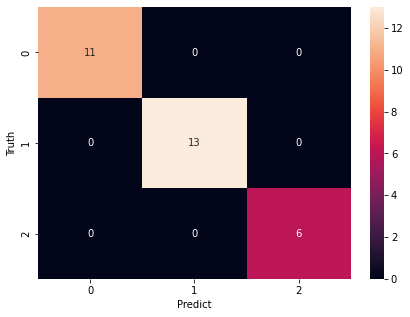

In [22]:
# k-value = 3
plt.figure(figsize=(7,5))
sns.heatmap(cm1, annot=True)
plt.xlabel('Predict')
plt.ylabel('Truth')

In [23]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Text(42.0, 0.5, 'Truth')

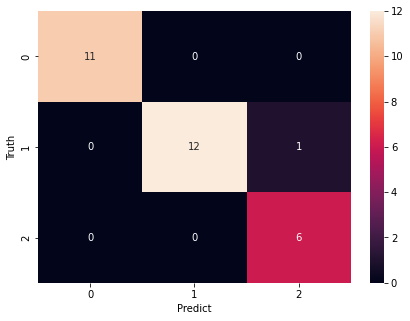

In [24]:
#K-Value = 10
plt.figure(figsize=(7,5))
sns.heatmap(cm2, annot=True)
plt.xlabel('Predict')
plt.ylabel('Truth')

In [25]:
print(classification_report(Y_test,Y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



Text(42.0, 0.5, 'Truth')

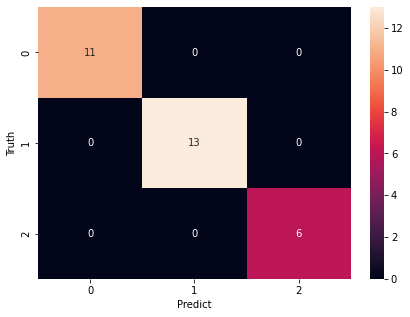

In [26]:
#K-Va;ue = 6 (optimal)
plt.figure(figsize=(7,5))
sns.heatmap(cm3, annot=True)
plt.xlabel('Predict')
plt.ylabel('Truth')

In [27]:
print(classification_report(Y_test,Y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

